In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
train_dataset = torchvision.datasets.FashionMNIST(root='./data', download= True, train = True, transform = transforms.Compose([transforms.ToTensor()]))
test_dataset = torchvision.datasets.FashionMNIST(root='./data', download= True, train = False, transform = transforms.Compose([transforms.ToTensor()]))

In [4]:
import torch.nn.functional as F
import numpy as np
from scipy.ndimage import zoom
import pickle
import os

length = len(train_dataset.data)
train_data = []

for x in range(length):

    test, target = train_dataset.__getitem__(x)
    
    test = test.unsqueeze(0)
    
    desired_shape = (224, 224)
    resized_image = F.interpolate(test, size=desired_shape, mode='bilinear', align_corners=False)
    
    resized_image = resized_image.squeeze(0).squeeze(0)
    resized_image = resized_image.numpy()

    new_image = np.array([resized_image,resized_image,resized_image])
    new_image = torch.tensor(new_image)
    
    train_data.insert(x, [new_image, target])

length = len(test_dataset.data)
test_data = []

for x in range(length):

    test, target = test_dataset.__getitem__(x)
    
    test = test.unsqueeze(0)
    
    desired_shape = (224, 224)
    resized_image = F.interpolate(test, size=desired_shape, mode='bilinear', align_corners=False)
    
    resized_image = resized_image.squeeze(0).squeeze(0)
    resized_image = resized_image.numpy()

    new_image = np.array([resized_image,resized_image,resized_image])
    new_image = torch.tensor(new_image)
    
    test_data.insert(x, [new_image, target])

In [5]:
from utils import FashionMnist_Dataset

train_dataset = FashionMnist_Dataset(train_data)
test_dataset = FashionMnist_Dataset(test_data)

BATCH_SIZE = 128

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [6]:
from utils import train_loop, test_loop, EarlyStopper
from pretrained_model import vgg16_pretrained

num_epochs = 60
lr = 0.001
patience = 5

early_stopper = EarlyStopper(patience=patience, min_delta=0)
model = vgg16_pretrained(train_last_layer_only= False)

model.to(device= device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

tr_acc, te_acc = [], []
tr_loss, te_loss = [], []

best_acc = 0

for epoch in range(num_epochs):
    train_loss, train_correct = train_loop(train_loader, model, loss_fn, optimizer, device)
    test_loss, test_correct = test_loop(test_loader, model, loss_fn, device)

    print('Train Acc epoch {} : {} '.format(epoch, train_correct))
    print('Test Acc epoch {} : {} '.format(epoch, test_correct))

    tr_acc.append(train_correct)
    te_acc.append(test_correct)

    tr_loss.append(train_loss)
    te_loss.append(test_loss)

    if early_stopper.early_stop(test_loss):
        print("Done! Early stopped at {}".format(epoch))
        break


c:\Users\ianch\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ianch\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\ianch\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across t

KeyboardInterrupt: 

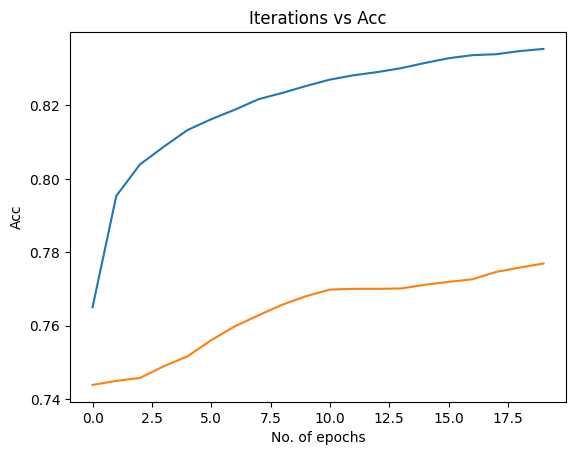

In [7]:
plt.plot(range(epoch+1), tr_acc)
plt.plot(range(epoch+1), te_acc)
plt.xlabel("No. of epochs")
plt.ylabel("Acc")
plt.title("Iterations vs Acc")
plt.show()

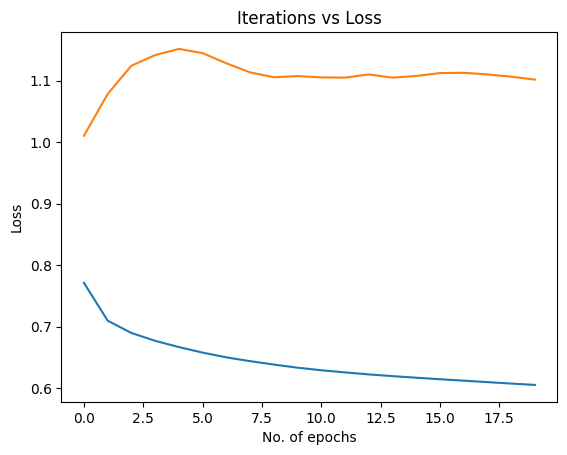

In [8]:
plt.plot(range(epoch+1), tr_loss)
plt.plot(range(epoch+1), te_loss)
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()

In [9]:
print("Best Acc : {} | Best Epoch : {}".format(max(te_acc), te_acc.index(max(te_acc))))

Best Acc : 0.7769 | Best Epoch : 19


In [10]:
import pickle
import os

file_name = 'pretrained_vgg16_unfreeze.pkl' 

with open(os.getcwd() + '/results/' + file_name, 'wb') as file:
    pickle.dump(tr_acc, file)
    pickle.dump(te_acc, file)
    pickle.dump(tr_loss, file)
    pickle.dump(te_loss, file)

In [11]:
file_name = 'pretrained_vgg16_unfreeze.pkl' 

with open(os.getcwd() + '/results/' + file_name, 'rb') as file:
    tr_acc = pickle.load(file)
    te_acc = pickle.load(file)
    tr_loss = pickle.load(file)
    te_loss = pickle.load(file)


print(tr_acc)
print(te_acc)
print(tr_loss)
print(te_loss)

[0.8274833333333333, 0.8486166666666667, 0.8536166666666667, 0.85655, 0.85885, 0.86105, 0.8620833333333333, 0.8629833333333333, 0.8635166666666667, 0.86435, 0.8652833333333333, 0.8658166666666667, 0.8667666666666667, 0.8675833333333334, 0.8681166666666666, 0.8684333333333333, 0.86895, 0.8691833333333333, 0.8698166666666667, 0.8700666666666667]
[0.8245, 0.8316, 0.8372, 0.8411, 0.8448, 0.8477, 0.8492, 0.8513, 0.8531, 0.8546, 0.8561, 0.8575, 0.8583, 0.8593, 0.8591, 0.86, 0.8608, 0.8619, 0.8628, 0.8635]
[0.5071128348228987, 0.4552437060975819, 0.4426140415340895, 0.43492090695116786, 0.42944840332579914, 0.4252475974217756, 0.42186615904832725, 0.41905574468484263, 0.41666437223143293, 0.4145862634940248, 0.41274013471842047, 0.4110673023514042, 0.40952875291936214, 0.4080986645915662, 0.40676038944299797, 0.40550373461886774, 0.4043210897997895, 0.4032051528089971, 0.4021492537508253, 0.4011478766447748]
[0.5889700804658377, 0.5642330923935117, 0.5496302313454409, 0.5374892150259597, 0.52